# **MÓDULO 40 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [5]:
#SEU CÓDIGO AQUI
df = pd.read_csv('CARRO_CLIENTES-M39-M40.csv')
df.head(11)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [6]:
df.info()  #verificando o tipo dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
(df.isnull().sum()/len(df))*100   #verificando a porcentagem de dados nulos

User ID         0.0
Gender          0.0
Age             0.0
AnnualSalary    0.0
Purchased       0.0
dtype: float64

In [8]:
df['Gender'].unique()  #verificando a ortográfia

array(['Male', 'Female'], dtype=object)

In [9]:
df.describe()  #verificando outliers

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [10]:
medianas = df.select_dtypes(include=['number']).median() #verificando a mediana das colunas.

print(medianas)

User ID           500.5
Age                40.0
AnnualSalary    72000.0
Purchased           0.0
dtype: float64


In [11]:
df=df.drop(['User ID'], axis=1) #dropando a coluna ID
df.head(2)

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [13]:
#SEU CÓDIGO AQUI
df=pd.get_dummies(df, columns=['Gender'])  #aplicando o one hot encoder nas colunas categoricas

for column in df.columns:                                       #transformando as variaveis booleanas em inteiras
    if df[column].dtype == 'bool':
        df[column] = df[column].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            1000 non-null   int64
 1   AnnualSalary   1000 non-null   int64
 2   Purchased      1000 non-null   int64
 3   Gender_Female  1000 non-null   int32
 4   Gender_Male    1000 non-null   int32
dtypes: int32(2), int64(3)
memory usage: 31.4 KB


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

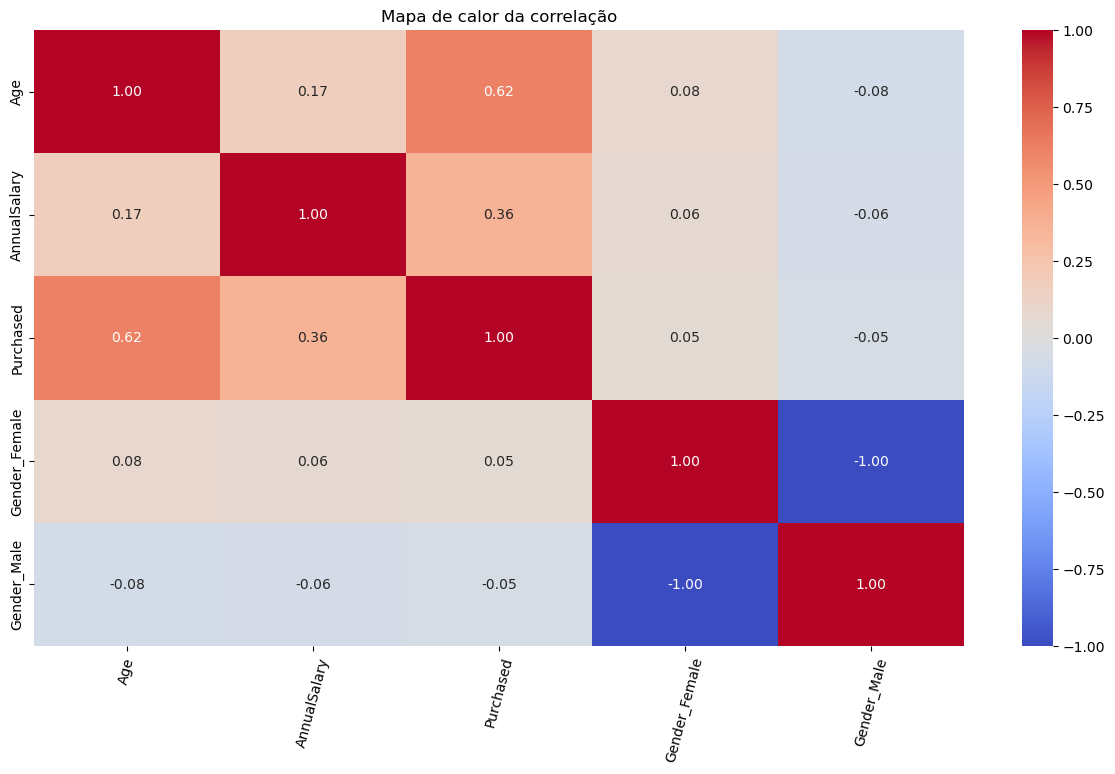

In [15]:
#SEU CÓDIGO AQUI
df_correlacao = df.select_dtypes(include=['number']).corr()    #separando as colunas numericas e criando um mapa de calor para a correlação das variaveis
plt.figure(figsize=(15,8))
sns.heatmap(df_correlacao, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Mapa de calor da correlação')
plt.xticks(rotation=75)
plt.show()

R - As variáveis que mais possuem correlação com a variável target é a idade e o sálario anual.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [18]:
#SEU CÓDIGO AQUI
x = df.drop('Purchased', axis=1) #separando a base entre treino e teste
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [19]:
x_train.shape

(750, 4)

In [20]:
x_test.shape

(250, 4)

In [21]:
y_train.shape

(750,)

In [22]:
y_test.shape

(250,)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [25]:
#SEU CÓDIGO AQUI
svm_linear = SVC(kernel='linear', random_state=1, C=1.0)  #treinando o SVM linear
svm_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=1)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [27]:
#SEU CÓDIGO AQUI
y_prev_linear = svm_linear.predict(x_test)  #realizando as previsões do SVM linear

relatorio_svm_linear = classification_report(y_test, y_prev_linear)  #criando o relatorio de metricas do SVM linear
print(relatorio_svm_linear)

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       138
           1       0.85      0.66      0.74       112

    accuracy                           0.80       250
   macro avg       0.81      0.78      0.79       250
weighted avg       0.80      0.80      0.79       250



# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [29]:
#SEU CÓDIGO AQUI
svm_poly = SVC(kernel='poly', random_state=1, C=1.0)  #treinando o SVM poly
svm_poly.fit(x_train, y_train)

SVC(kernel='poly', random_state=1)

In [30]:
y_prev_poly = svm_poly.predict(x_test)  #realizando as previsões do SVM poly

relatorio_svm_poly = classification_report(y_test, y_prev_poly)  #criando o relatorio de metricas do SVM poly
print(relatorio_svm_poly)

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       138
           1       0.88      0.39      0.54       112

    accuracy                           0.70       250
   macro avg       0.77      0.67      0.66       250
weighted avg       0.76      0.70      0.67       250



# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

R - Ao comparar o SVM linear, SVM poly e XGBoost foi possivél perceber que o XGBoost teve um desempenho melhor que os dois SVM, o XGBoost teve um f1-score de 0.89 na classe 0 e de 0.86 na classe 1 e uma acúracia de 0.88, eu acredito que essa melhora se deu por conta dos hyperparametros do XGBoost e por seu método de criar e testar diversas árvores para achar a melhor combinação por isso ele acaba se adequando melhor em ploblemas de classificação, quanto ao SVM o kernel linear teve um desempenho melhor que o poly, então provavelmente os dados estão distribuidos de forma linear.